Here we use different parameters of persons' life to estimate how well their social and work life is balanced from given data.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df0 = pd.read_csv("C:/Users/Com/Downloads/Compressed/Wellbeing_and_lifestyle_data_Kaggle1.csv")
df0.head(10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,07-07-2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,07-07-2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,07-07-2015,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,07-07-2015,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,07-07-2015,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
5,07-08-2015,3,2,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,Female,722.3
6,07-08-2015,4,2,10,6,10,10,3,5,2,...,7,10,0,2,10,8,10,51 or more,Male,727.2
7,07-09-2015,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,676.2
8,07-09-2015,5,3,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,21 to 35,Female,702.8
9,07-10-2015,4,4,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,Female,634.4


In [4]:
df1 = df0.drop("Timestamp",axis=1)
df1.head()
print(df1.shape)

(15972, 23)


In [5]:
df1.isnull().sum()

FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [6]:
df1.dtypes

FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

In [7]:
series_is_string = pd.api.types.is_string_dtype(df1['DAILY_STRESS'])
print(series_is_string)

False


Int64Index([3, 2, 4, 1, 5, 0], dtype='int64')


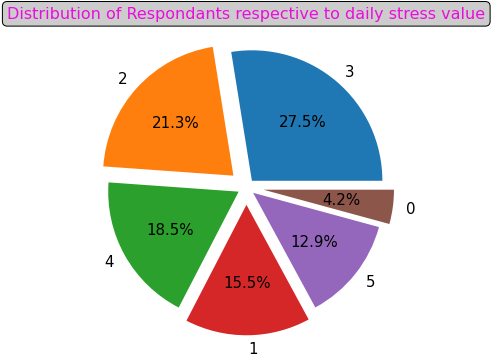

In [8]:
pie_data = df1["DAILY_STRESS"].value_counts(1)*100
#type(pie_data)
print(pie_data.index)
#print(pie_data.to_numpy())
plt.pie(pie_data,labels=pie_data.index,explode=(0.1,0.2,0.1,0.2,0.1,0.2),autopct='%1.1f%%',textprops={'fontsize':15},radius=1.5)
plt.title("Distribution of Respondants respective to daily stress value",y=1.25,fontsize=16,fontweight=20,color='#eb0cdf',bbox={'boxstyle':'round','facecolor':'0.8'})
plt.show()

In [9]:
df1['AGE'].unique()

array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

In [10]:
df1['AGE'] = df1['AGE'].map({'Less than 20':0,'21 to 35':1,'36 to 50':2,'51 or more':3})
df1['AGE'].unique()

array([2, 3, 1, 0], dtype=int64)

In [11]:
def weightedavg(values,weights,item):
    return (values*weights).groupby([item]).sum()/weights.groupby([item]).sum()

<AxesSubplot:xlabel='AGE', ylabel='count'>

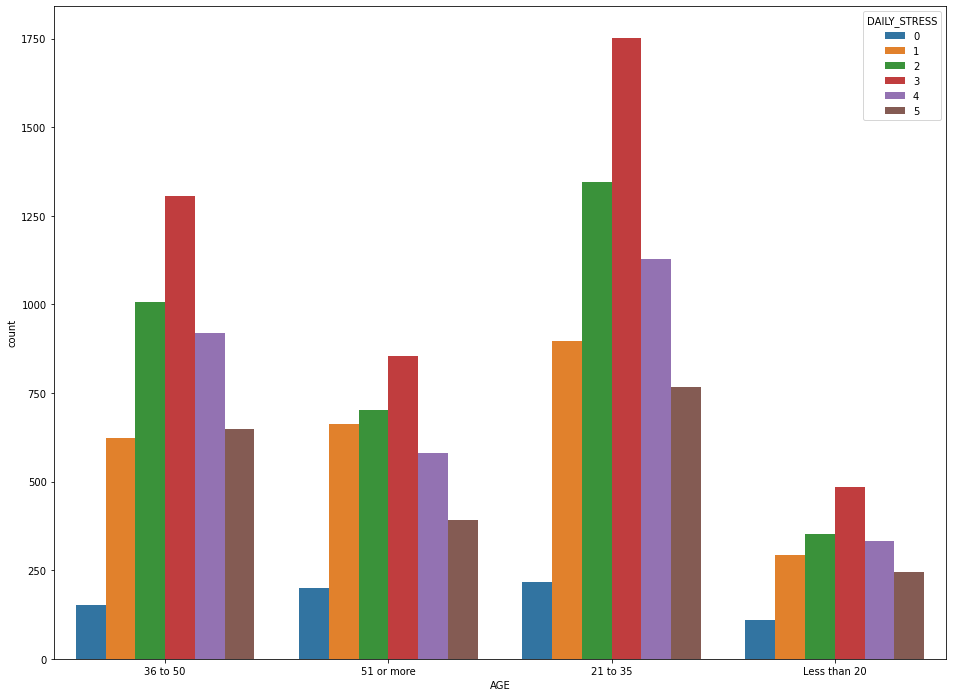

In [12]:
plt.figure(figsize=(16,12))
sns.countplot(data=df0,hue='DAILY_STRESS',x= 'AGE',orient='v')
#sns.legend("AGE labels")

<AxesSubplot:xlabel='GENDER', ylabel='count'>

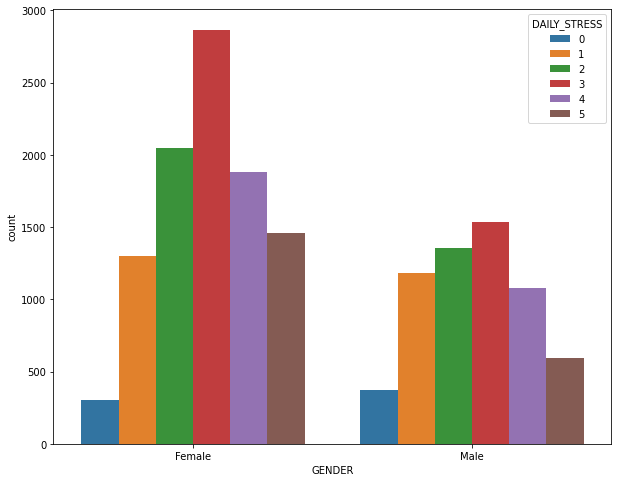

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data=df0,hue='DAILY_STRESS',x='GENDER')

<AxesSubplot:xlabel='TIME_FOR_PASSION', ylabel='count'>

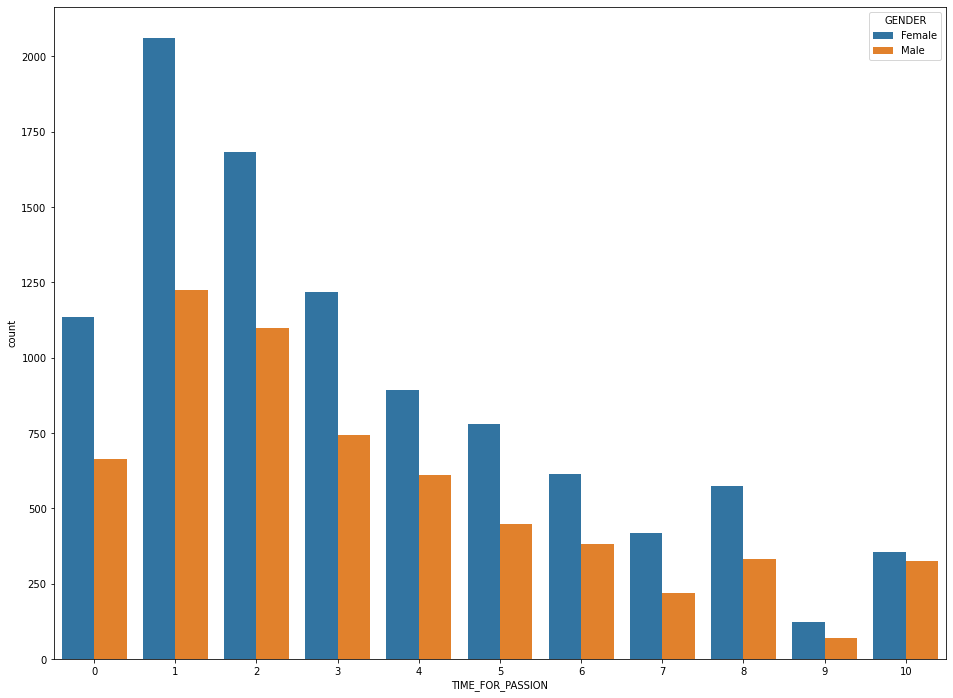

In [14]:
plt.figure(figsize=(16,12))
sns.countplot(data=df0,hue='GENDER',x='TIME_FOR_PASSION')

<AxesSubplot:title={'center':'Average Daily Stress hours in Male and Female'}, xlabel='GENDER', ylabel='DAILY_STRESS'>

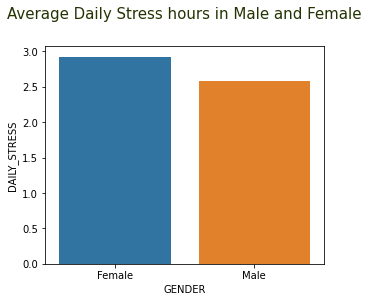

In [15]:
#df1.head(5)
#First we take daily stress and gender from full dataframe and then group it by gender and take 
# mean of all values and then reset index because after groupby function , Gender become index 
# rather column and we want it as column
tempdf1 = df1[['DAILY_STRESS','GENDER']].groupby(['GENDER']).mean().reset_index()
#tempdf1 = tempdf1.rename('DAILY_STRESS_MEAN')
#tempdf1.head(20)
#tempdf1['GENDER']
#tempdf1.plot.bar()
plt.figure(figsize=(5,4))
plt.title("Average Daily Stress hours in Male and Female",color='#243303',fontsize=15,y=1.1)
sns.barplot(data=tempdf1,x='GENDER',y='DAILY_STRESS',orient='v')

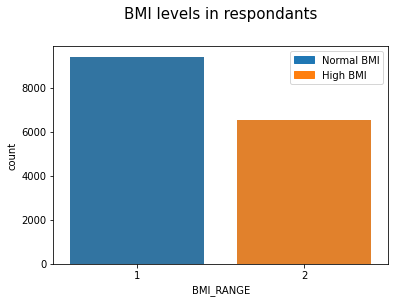

In [16]:
#tempdf2 = df1[['BMI_RANGE','GENDER']].groupby(['GENDER']).mean().reset_index()
patch1 = mpl.patches.Patch(color='tab:blue',label='Normal BMI')
patch2 = mpl.patches.Patch(color='tab:orange',label='High BMI')
plt.title("BMI levels in respondants",y= 1.1,fontsize=15)
sns.countplot(data=df1,x='BMI_RANGE').legend(handles=[patch1,patch2])

<AxesSubplot:title={'center':'Age wise Weekly Meditation trend'}, xlabel='AGE', ylabel='count'>

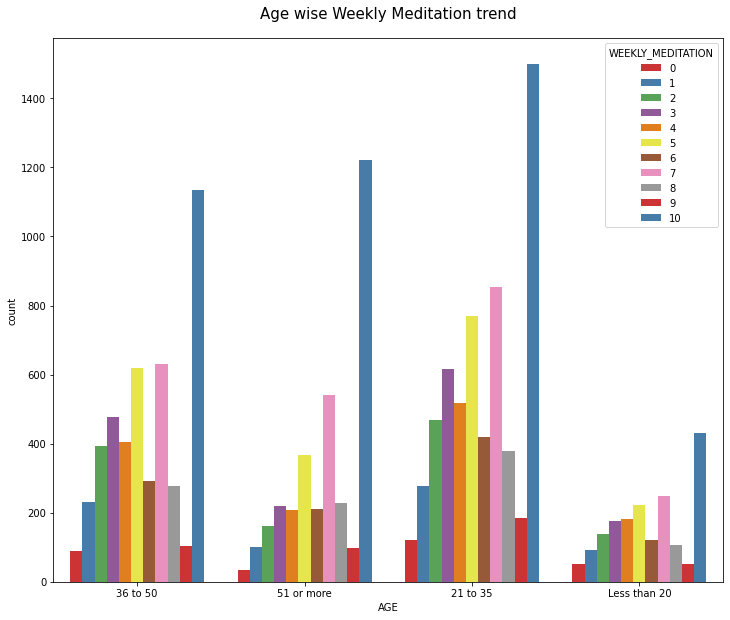

In [17]:
plt.figure(figsize=(12,10))
plt.title("Age wise Weekly Meditation trend",y=1.025,fontsize=15)
sns.countplot(data=df0,hue='WEEKLY_MEDITATION',x='AGE',palette='Set1')

            AGE  WEEKLY_MEDITATION
0      21 to 35           6.085625
1      36 to 50           5.980666
2    51 or more           6.995575
3  Less than 20           5.955470


<AxesSubplot:title={'center':'Age wise average weekly meditation hours'}, xlabel='AGE', ylabel='WEEKLY_MEDITATION'>

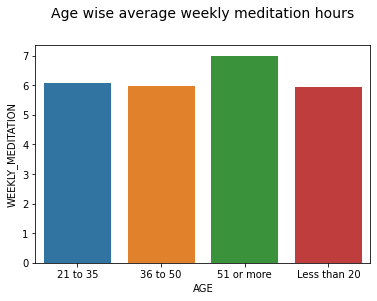

In [18]:
tempdf2 = df0[['WEEKLY_MEDITATION','AGE']].groupby(['AGE']).mean().reset_index()
print(tempdf2.head())
plt.title("Age wise average weekly meditation hours",y= 1.1,fontsize=14)
sns.barplot(data=tempdf2,x='AGE',y='WEEKLY_MEDITATION')

   GENDER  WEEKLY_MEDITATION
0  Female           6.025664
1    Male           6.568204


<AxesSubplot:title={'center':'Gender wise average weekly meditation hour'}, xlabel='GENDER', ylabel='WEEKLY_MEDITATION'>

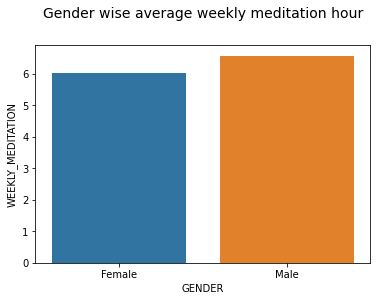

In [19]:
tempdf3 = df0[['WEEKLY_MEDITATION','GENDER']].groupby(['GENDER']).mean().reset_index()
print(tempdf3.head())
plt.title("Gender wise average weekly meditation hour",y= 1.1,fontsize=14)
sns.barplot(data=tempdf3,x='GENDER',y='WEEKLY_MEDITATION')

Text(0.5, 1.1, 'Gender wise weekly meditation hour')

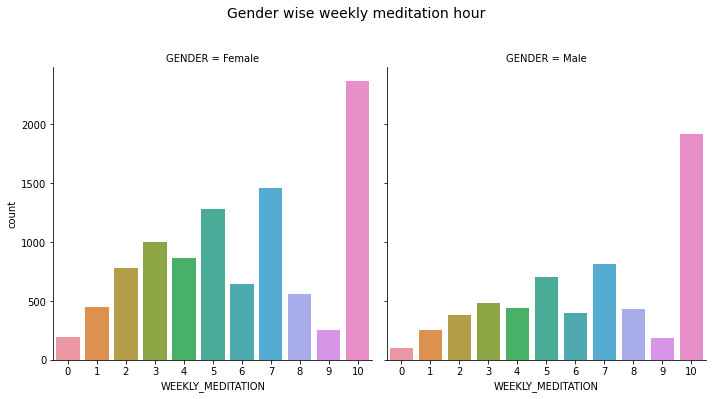

In [20]:
#tempdf2 = df0[['WEEKLY_MEDITATION','AGE']].groupby(['AGE']).mean().reset_index()
#print(tempdf2.head())
#plt.title("Gender wise weekly meditation hour",y= 1.1,fontsize=14)
sns.catplot(data=df1,col='GENDER',x='WEEKLY_MEDITATION',kind='count').fig.suptitle("Gender wise weekly meditation hour",y=1.1,fontsize=14)

In [21]:
#fem_med1 = (df1['WEEKLY_MEDITATION'].mul(df1['GENDER'].value_counts()[0])).sum()/(df1['GENDER'].value_counts()[0]).sum()
#Temp calculations
tempfemale = (df1['GENDER']).value_counts()[0]
print(tempfemale)
#print(fem_med1)

#cc = ((df1[['WEEKLY_MEDITATION','GENDER']].groupby(['GENDER']).filter(lambda x : x =='Female')).mul(df1['GENDER'].value_counts()[1])).sum()
#print(cc)

print(df1[['WEEKLY_MEDITATION','GENDER']].query('GENDER == "Female"').head(10))


cc1 = (df1[['WEEKLY_MEDITATION','GENDER']].groupby(['GENDER']).get_group('Female'))#.mul(df1['GENDER'].value_counts()[1])
print(cc1.head(10))
cc2 = cc1.drop('GENDER',axis=1)
cc3 = cc2.mul(df1['GENDER'].value_counts()[1])
cc4 = cc3.sum()
cc5 = cc4/tempfemale
print(cc4)
print(cc5)


#X = (df1[['WEEKLY_MEDITATION','GENDER']].groupby(['GENDER']).mul()sum().values[1])
#w = (df1['GENDER'].value_counts()[1])
#w2 = (df1['GENDER'].value_counts()[1])
#print(X)
#print(w)
#print(X*w/w2)

#temp_df = df1[['WEEKLY_MEDITATION','GENDER']].groupby(['GENDER']).sum()
#newtempdf= temp_df.values[0]
#print(newtempdf)

9858
    WEEKLY_MEDITATION  GENDER
0                   5  Female
1                   6  Female
2                   3  Female
3                   0  Female
4                   5  Female
5                   3  Female
7                   2  Female
8                  10  Female
9                   1  Female
10                  6  Female
    WEEKLY_MEDITATION  GENDER
0                   5  Female
1                   6  Female
2                   3  Female
3                   0  Female
4                   5  Female
5                   3  Female
7                   2  Female
8                  10  Female
9                   1  Female
10                  6  Female
WEEKLY_MEDITATION    363177714
dtype: int64
WEEKLY_MEDITATION    36840.912355
dtype: float64


In [22]:
df1.columns[3]

'CORE_CIRCLE'

In [23]:
def covs(n):
    covdict = {}
    covlist = []
    for x in range(n):
        s = df1.columns[x]
        cov = df1[s].cov(df1['WORK_LIFE_BALANCE_SCORE'])
        print("Covariance between",s,"and WORK LIFE BALANCE SCORE is ",cov)
        covdict[s] = cov
        covlist.append(cov)
          
    #To find the Highest Covariance and between what...
    for c in covlist:
         if(c == max(covlist)):
                # To get key from value in dictionary...
            col_str = list(covdict.keys())[list(covdict.values()).index(c)]
            return col_str,covlist   

In [24]:
m,n=covs(20) # covs return two values so we use m and n
print("\nThe highest covariance is",max(n),"and it is for",m)

Covariance between FRUITS_VEGGIES and WORK LIFE BALANCE SCORE is  29.373946887956798
Covariance between DAILY_STRESS and WORK LIFE BALANCE SCORE is  -22.49763031473133
Covariance between PLACES_VISITED and WORK LIFE BALANCE SCORE is  78.96664321052228
Covariance between CORE_CIRCLE and WORK LIFE BALANCE SCORE is  64.89999099372494
Covariance between SUPPORTING_OTHERS and WORK LIFE BALANCE SCORE is  80.10768925608546
Covariance between SOCIAL_NETWORK and WORK LIFE BALANCE SCORE is  57.33365898070043
Covariance between ACHIEVEMENT and WORK LIFE BALANCE SCORE is  69.63213211248168
Covariance between DONATION and WORK LIFE BALANCE SCORE is  38.247121811833914
Covariance between BMI_RANGE and WORK LIFE BALANCE SCORE is  -5.58110987086333
Covariance between TODO_COMPLETED and WORK LIFE BALANCE SCORE is  64.44378224082993
Covariance between FLOW and WORK LIFE BALANCE SCORE is  50.753739610500865
Covariance between DAILY_STEPS and WORK LIFE BALANCE SCORE is  55.05227684231012
Covariance betwee

In [25]:
corr_data = df1.corr()
type(corr_data)

pandas.core.frame.DataFrame

<AxesSubplot:>

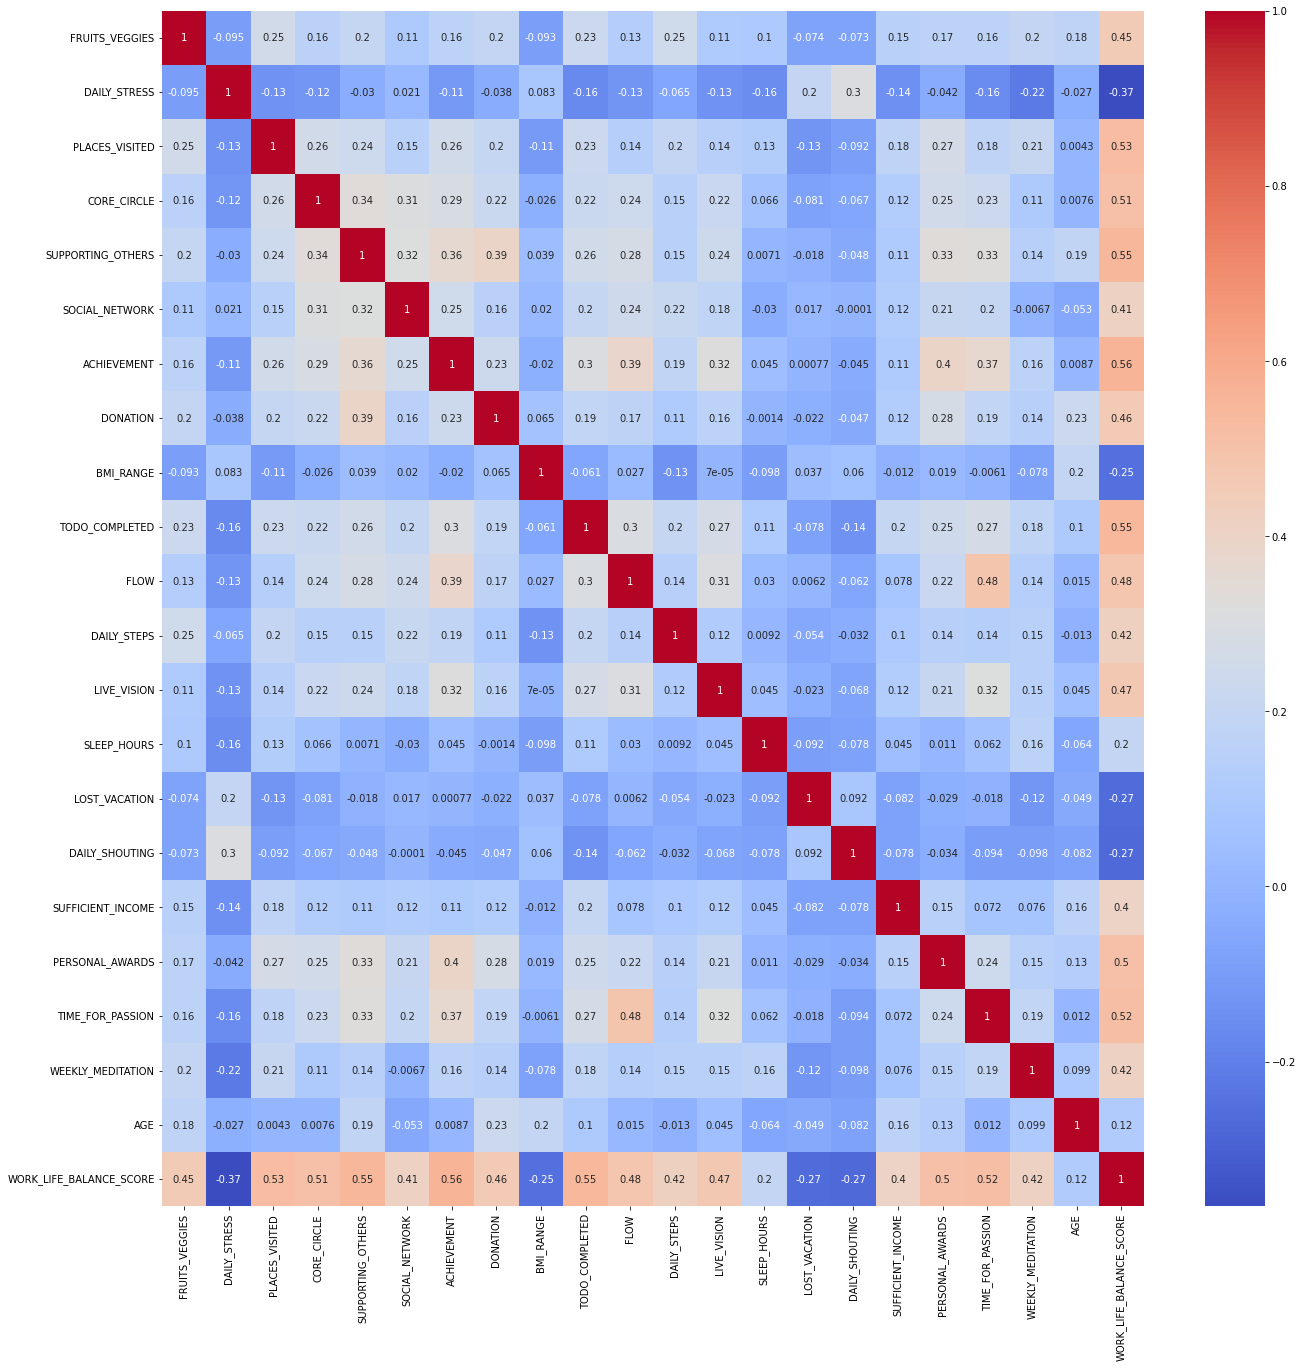

In [26]:
plt.figure(figsize=(22,22))
sns.heatmap(corr_data,annot=True,cmap="coolwarm")

In [27]:
def density_plot(dataframe):
    #plot[]=None
    for p in range(dataframe.shape[1]-1):
        if (str(dataframe.dtypes[p])=='int64'):
            col_name = dataframe.columns[p]
            #We need to create plot figure to generate different plots every time otherwise it would overlap
            plt.figure()
            sns.kdeplot(data=dataframe[col_name])
    
        else:
            print('ERROR: Categorical Data in',dataframe.columns[p])

ERROR: Categorical Data in GENDER


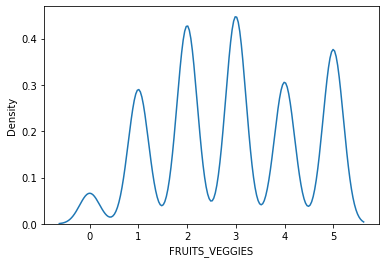

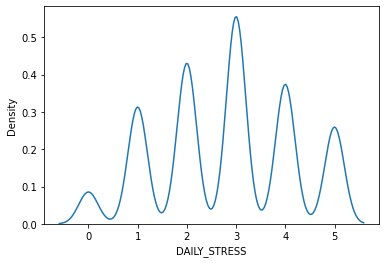

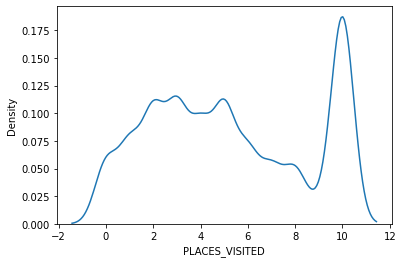

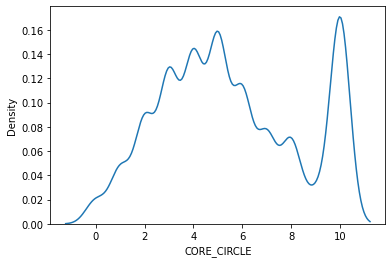

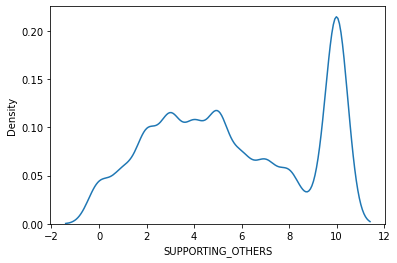

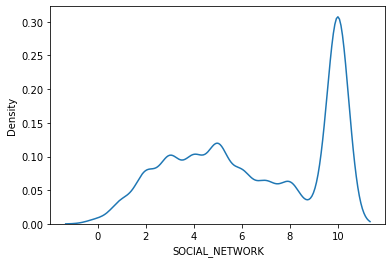

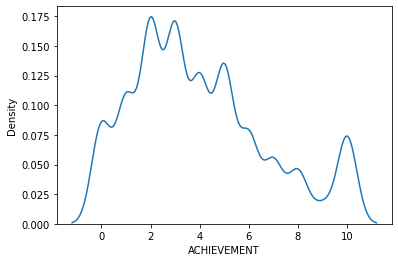

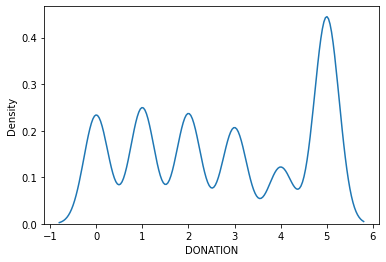

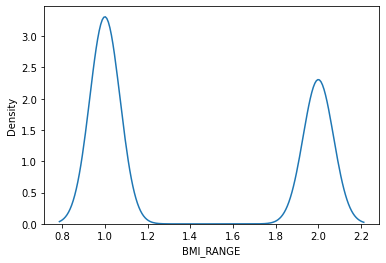

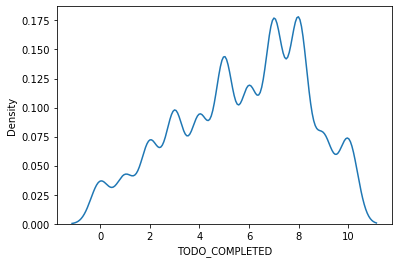

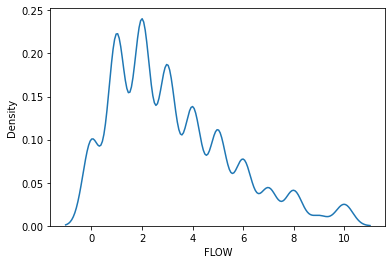

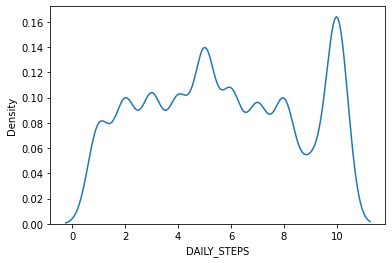

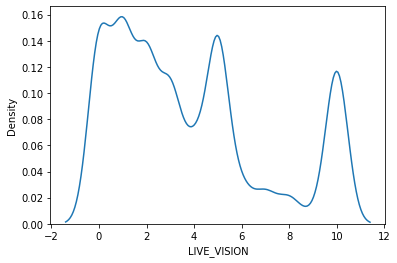

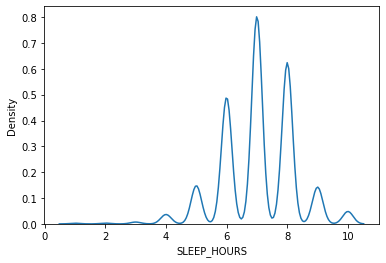

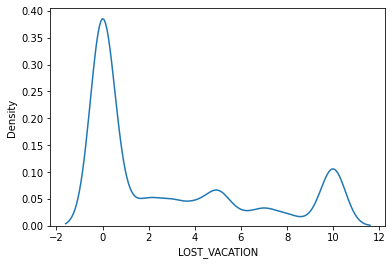

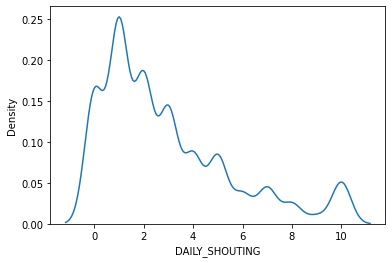

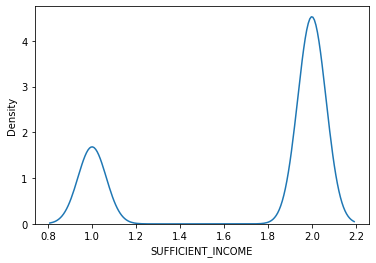

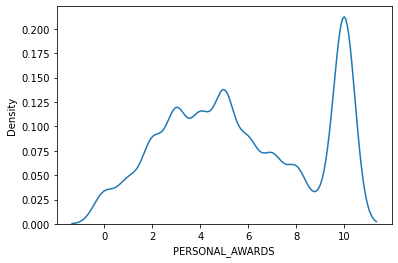

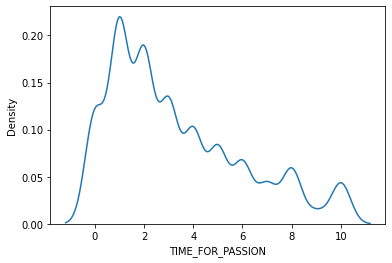

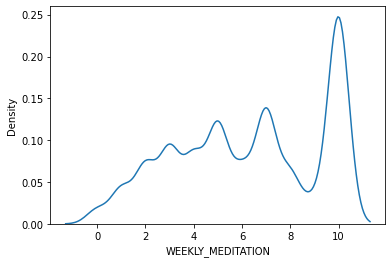

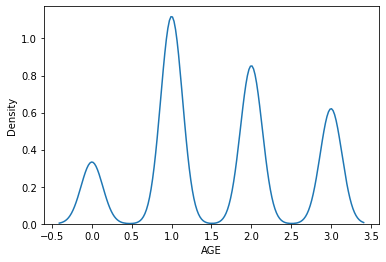

In [28]:
mpl.rc('figure', max_open_warning = 0)

density_plot(df1)

In [29]:
df2=df1.copy(deep=True)

In [30]:
df2['GENDER'] = df2['GENDER'].map({'Female':0,'Male':1})

In [31]:
df2.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [32]:
X = df2.iloc[:,:-1]

In [33]:
X.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER'],
      dtype='object')

In [34]:
y = df2.iloc[:,-1]

In [45]:
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True)

In [42]:
X_train.shape

(10701, 22)

In [43]:
y_test.shape

(5271,)

In [46]:
linmodel = skl.linear_model.LinearRegression()
linmodel.fit(X_train,y_train)

LinearRegression()

In [47]:
y_predicted = linmodel.predict(X_test)

In [48]:
linmodel.score(X_test,y_test)

0.9999999757960508

In [49]:
skl.metrics.r2_score(y_test,y_predicted)

0.9999999757960508

In [50]:
linmodel.coef_

array([ 3.40047993e+00, -3.39845159e+00,  1.69943795e+00,  1.69908498e+00,
        1.70047849e+00,  1.70019946e+00,  1.69963701e+00,  3.40090432e+00,
       -1.69976984e+01,  1.69993204e+00,  1.70106252e+00,  1.90000965e+00,
        1.69962038e+00,  1.89982031e+00, -1.69958024e+00, -1.70069329e+00,
        1.70030360e+01,  1.70059161e+00,  1.70057453e+00,  1.69940075e+00,
       -2.08636274e-03,  4.09193020e-03])

In [51]:
lassomodel = skl.linear_model.Lasso(alpha=0.1)
lassomodel.fit(X_train,y_train)

Lasso(alpha=0.1)

In [52]:
lassomodel.score(X_test,y_test)

0.9999490494783125

In [53]:
lassomodel.coef_

array([  3.38827443,  -3.3841669 ,   1.71421003,   1.70150186,
         1.7008268 ,   1.69619183,   1.69884277,   3.3707886 ,
       -16.57577672,   1.71573457,   1.6860228 ,   1.90532142,
         1.70174935,   1.85090675,  -1.69798063,  -1.70047999,
        16.49564278,   1.70011697,   1.69755207,   1.70411165,
         0.        ,   0.        ])

In [55]:
import decimal
print(decimal.Decimal.from_float(skl.metrics.mean_squared_error(y_test,y_predicted)))

0.0000491146219517872768302313435384576223441399633884429931640625
